<center><h1 style="text-decoration: underline;">Vodafone Customer Churn Prediction</h1></center>

##### <h2 style="text-decoration: underline;">Project Scenario</h2>

Every company wants to increase its profit or revenue margin and customer retention is one key area industry players focus their resources. In today's world of machine learning, most companies build classification models to perform churn analysis on their customers. 

Classification in machine learning and statistics is a supervised learning approach in which the computer program learns from the data given to it and makes new observations or classifications. The main goal is to identify which class/category the new data will fall into. 

##### <h3 style="text-decoration: underline;">Business Understanding</h3>

***Objective:***

The primary objective of this project is to develop a classification model for churn analysis to aid in customer retention efforts. Churn analysis focuses on predicting whether customers are likely to leave or continue their relationship with the company. By identifying customers at risk of churning, the company can take proactive measures to retain them, thus increasing revenue and profit margins.

***Background:***

In today's competitive business landscape, customer retention is paramount for sustaining profitability and growth. Retaining existing customers is often more cost-effective than acquiring new ones. Churn analysis leverages machine learning and statistical techniques to predict customer behavior and identify potential churners before they defect to competitors.

***Data Description:***

The project will utilize historical data encompassing various customer attributes, transactional details, and behavioral patterns. These may include demographic information, purchase history, engagement metrics, customer service interactions, and any other relevant data points. The dataset will be sufficiently large and diverse to capture the complexities of customer behavior across different segments.

***Methodology:***

The project will employ a supervised learning approach, specifically classification algorithms, to train predictive models. These models will learn from past instances of churn and non-churn events to classify new customers accordingly. Various classification algorithms such as logistic regression, decision trees, random forests, and gradient boosting will be explored to identify the most effective model for the given dataset.

***Key Deliverables:***

1. Churn Prediction Model: A robust machine learning model capable of accurately predicting customer churn based on input features.
2. Feature Importance Analysis: Identification of the most influential factors driving churn, providing actionable insights for targeted retention strategies.
3. Model Evaluation: Rigorous evaluation of model performance using appropriate metrics such as accuracy, precision, recall, and F1-score. The model will be validated using techniques like cross-validation and holdout validation to ensure generalizability.
4. Deployment Strategy: Recommendations for integrating the churn prediction model into the company's existing systems or workflows for real-time monitoring and intervention.

***Expected Outcomes:***

By leveraging the insights gained from the churn analysis model, the company expects to:

- Proactively identify customers at risk of churn.
- Tailor retention strategies and incentives to address specific customer needs and pain points.
- Optimize resource allocation by focusing retention efforts on high-value customers with the highest churn propensity.
- Ultimately, improve overall customer retention rates, thereby enhancing long-term profitability and competitiveness in the market.

***Conclusion:***

Churn analysis represents a strategic initiative aimed at leveraging data-driven insights to mitigate customer attrition and foster long-term loyalty. By harnessing the power of classification models, the company endeavors to enhance customer retention efforts, drive sustainable revenue growth, and maintain a competitive edge in the dynamic marketplace.


##### <h3 style="text-decoration: underline;">Hypothesis Testing</h3>
##### Hypothesis 1

***Null Hypothesis(Ho)***: Customers with longer tenure (number of months stayed with the company) are more likely to churn compared to new customers.

***Alternative Hypothesis(Ha)***: Customers with longer tenure (number of months stayed with the company) are less likely to churn compared to new customers.

##### Hypothesis 2

Null Hypothesis (Ho): Customers with higher monthly charges (MonthlyCharges) are more likely to churn due to cost considerations.

Alternative Hypothesis (Ha): Customers with higher monthly charges (MonthlyCharges) are less likely to churn due to cost considerations.

##### <h4 style="text-decoration: underline;">Business Questions</h4>
1. What is the average tenure of customers who churned compared to those who stayed?
2. Do customers with partners or dependents have a lower churn rate?
3. How does the presence of multiple lines affect customer churn?
4. Is there a correlation between the contract term (Contract) and customer churn?
5. What are the common payment methods (Payment Method) among customers who churned?
6. How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?
7. What percentage of customers who churned had streaming services (StreamingTV, StreamingMovies)?
8. Is there a difference in churn rates between senior citizens and non-senior citizens?
9. How does the total amount charged to customers (TotalCharges) correlate with churn behavior?
10. How does the contract affect churn rates?


#### ***Import necessary libraries***

In [1]:
from dotenv import dotenv_values 
import pyodbc 
import numpy as np
import pandas as pd                          
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from scipy.stats import mannwhitneyu 
from scipy.stats import chi2_contingency
from scipy.stats import stats
# Machine Learning Packages:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


#### Step 2 - Data Understanding
###### 
The data for this project is in differnt files and will be loaded into the notebook. The following describes the columns present in the data.

`Gender` -- Whether the customer is a male or a female

`SeniorCitizen` -- Whether a customer is a senior citizen or not

`Partner` -- Whether the customer has a partner or not (Yes, No)

`Dependents` -- Whether the customer has dependents or not (Yes, No)

`Tenure` -- Number of months the customer has stayed with the company

`Phone Service` -- Whether the customer has a phone service or not (Yes, No)

`MultipleLines` -- Whether the customer has multiple lines or not

`InternetService` -- Customer's internet service provider (DSL, Fiber Optic, No)

`OnlineSecurity` -- Whether the customer has online security or not (Yes, No, No Internet)

`OnlineBackup` -- Whether the customer has online backup or not (Yes, No, No Internet)

`DeviceProtection` -- Whether the customer has device protection or not (Yes, No, No internet service)

`TechSupport` -- Whether the customer has tech support or not (Yes, No, No internet)

`StreamingTV` -- Whether the customer has streaming TV or not (Yes, No, No internet service)

`StreamingMovies` -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

`Contract` -- The contract term of the customer (Month-to-Month, One year, Two year)

`PaperlessBilling` -- Whether the customer has paperless billing or not (Yes, No)

`Payment Method` -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

`MonthlyCharges` -- The amount charged to the customer monthly

`TotalCharges` -- The total amount charged to the customer

`Churn` -- Whether the customer churned or not (Yes or No)

#### First Dataset
By using Python's dotenv with a .env file to safely fetch the first dataset from a SQL database into the notebook. This keeps the database credentials private while allowing easy access to the data for analysis.

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [3]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

In [5]:
# Sql query to get the 2020 data
query = "Select * FROM LP2_Telco_churn_first_3000"
First_Dataset = pd.read_sql(query, connection)

In [6]:
#Save file to csv
# First_Dataset.to_csv('DataSets\LP2_Telco_churn_first_3000.csv', index=False)

In [7]:
# Preview of the first Data set 
First_Dataset.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


In [8]:
First_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


#### Second Dataset
Now, obtaining the second dataset from a GitHub repository, and use Pandas to import the CSV file into the notebook for analysis.

In [9]:
# Loading the second dataset into the notebook
Second_Dataset = pd.read_csv(r"DataSets/LP2_Telco-churn-second-2000.csv")

In [10]:
Second_Dataset.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


In [11]:
Second_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


#### Third Dataset
Finally, obtaining the third dataset from a OneDrive file, and use Pandas to import the Excel file into the notebook for analysis.

In [12]:
# Loading the second dataset into the notebook
Third_Dataset = pd.read_excel(r"DataSets/Telco-churn-last-2000.xlsx")

In [13]:
Third_Dataset.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55


In [14]:
Third_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


##### Now, checking if the first and second Dataset have the same column names for easy concatenation.

In [15]:
# Get the column names from each DataFrame
columns_First_Dataset = set(First_Dataset.columns)
columns_Second_Dataset = set(Second_Dataset.columns)

# Check if all DataFrames have the same column names
if columns_First_Dataset == columns_Second_Dataset:
    print("All DataFrames have the same column names.")
else:
    print("Not all DataFrames have the same column names.")

All DataFrames have the same column names.


Next, concatenating the first and second Dataset to prepare them for analysis and training

In [16]:
train_df = pd.concat([First_Dataset, Second_Dataset], ignore_index=True)

In [17]:
#Save file to csv
# train_df.to_csv('DataSets\Final_Dataset\Final_Datasets.csv', index=False)

In [18]:
train_df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


In [19]:
# Change all column names to lowercase
train_df.columns = train_df.columns.str.lower()

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 


##### After the concatnation we will have to check if there is a null values in our concatnated dataset

In [21]:
train_df.isnull().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          5
churn                 1
dtype: int64

In [22]:
#Checking  for unique values in all the columns
cols= [ 'customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']


results = []

for i in cols:
    
    unique_values = train_df[i].unique()
    num_unique_values = train_df[i].nunique()
    
    
    results.append([i, unique_values, num_unique_values])


results_df = pd.DataFrame(results, columns=['Column', 'Unique_Values', 'Num_Unique_Values'])


results_df

,Column,Unique_Values,Num_Unique_Values
0,customerid,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",5043
1,gender,"[Female, Male]",2
2,seniorcitizen,"[0, 1]",2
3,partner,"[True, False, No, Yes]",4
4,dependents,"[False, True, No, Yes]",4
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
6,phoneservice,"[False, True, Yes, No]",4
7,multiplelines,"[None, False, True, No, No phone service, Yes]",5
8,internetservice,"[DSL, Fiber optic, No]",3
9,onlinesecurity,"[False, True, None, No, Yes, No internet service]",5


In [23]:
# Function replace None with Pandas NaN
def replace_none(value):
    like_nan = {'none', ''}
    if pd.isnull(value) or (isinstance(value, str) and (value.lower().strip() in like_nan)):
        value = pd.NA
    
    return value

# Apply the function to all columns
train_df = train_df.applymap(replace_none) # element-wise

To ensure consistent and uniform data entry, we have to standardize certain columns by replacing all occurrences of False with No and all occurrences of True with Yes. This process helps maintain clarity and consistency in the data, making it easier to interpret and analyze.

In [24]:
# Define the mapping for standardization
standardize_mapping = {
    'No phone service': 'No',
    'No internet service': 'No',
    True: 'Yes',
    False: 'No',
}
   
# Columns to perform standardization
cols_to_standardize = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
                       'streamingtv', 'streamingmovies', 'paperlessbilling', 'churn',
                       'phoneservice', 'multiplelines', 'partner', 'dependents']

# Loop through columns for standardization
for col in cols_to_standardize:
    if train_df[col].dtype == 'object':
        train_df[col] = train_df[col].replace(standardize_mapping)

# Show the updated DataFrame
train_df.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,<NA>,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes


Handling Missing Values: To address missing values in specific columns, check for null values and filled them by randomly selecting a value from each column with missing data.

In [25]:
train_df.isnull().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          8
churn                 1
dtype: int64

Filling the missing values in 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies' with a 'NO' value 

In [26]:
# Filling all missing values with 'no'
cols_to_use = ['multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
for values in cols_to_use:
    if train_df[values].isna().any() == True:
        train_df[values] = train_df[values].fillna('No')
        

Filling the missing values in the totalcharges column with their corresponding values in the monthlycharge column

In [27]:
#Creating a mask variable for the missing values in the column for totalcharges
mask = train_df['totalcharges'].isna()

# Filling the missing values of totalcharge with the values of the monthlycharge
train_df['totalcharges'].fillna(train_df.loc[mask,'monthlycharges'], inplace = True)

Changing the datatype of the Total Charges column from string to float

In [28]:
train_df['totalcharges'] = train_df['totalcharges'].astype(float)

Filling the missing value in the churn column with the mode

In [29]:
# Filling the missing value in the churn column with mode
mode_churn = train_df['churn'].mode()[0]
train_df['churn'] = train_df['churn'].fillna(mode_churn)

Dropping the customerid column from our Data Frame as we will not need it for analysis

In [30]:
train_df.drop('customerid', axis=1,inplace =True)

Checking the dataset again

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   seniorcitizen     5043 non-null   int64  
 2   partner           5043 non-null   object 
 3   dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   phoneservice      5043 non-null   object 
 6   multiplelines     5043 non-null   object 
 7   internetservice   5043 non-null   object 
 8   onlinesecurity    5043 non-null   object 
 9   onlinebackup      5043 non-null   object 
 10  deviceprotection  5043 non-null   object 
 11  techsupport       5043 non-null   object 
 12  streamingtv       5043 non-null   object 
 13  streamingmovies   5043 non-null   object 
 14  contract          5043 non-null   object 
 15  paperlessbilling  5043 non-null   object 
 16  paymentmethod     5043 non-null   object 


We now have a dataset with no missing values

In [32]:
train_df.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

##### Saving the cleaned dataset to CSV

In [33]:
# train_df.to_csv('DataSets\Final_Dataset\Final_Datasets.csv', index=False)

#### Explanatory Data Analysis 


##### Univariate Analysis

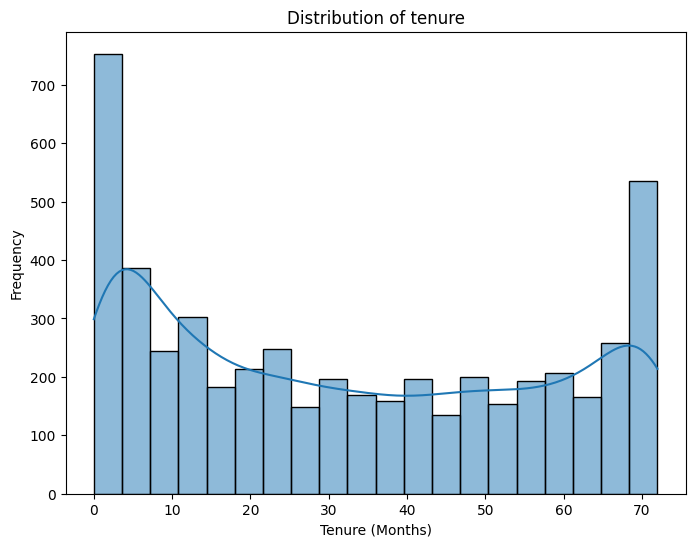

Summary statistics for Tenure:
count    5043.000000
mean       32.576641
std        24.529807
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


In [34]:
# Tenure
plt.figure(figsize=(8, 6))
sns.histplot(train_df['tenure'], bins=20, kde=True)
plt.title('Distribution of tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

print("Summary statistics for Tenure:")
print(train_df['tenure'].describe())

#### **Key Insights**

- Mean: The average tenure is approximately 32.58 months. This means that on average, individuals or customers stay for about 32.58 months.

- Standard Deviation (std): The standard deviation is approximately 24.53 months. This indicates a wide spread around the mean, suggesting a significant variation in the tenure lengths of individuals or customers.

- Minimum (min): The shortest tenure observed is 0 months. This could represent new customers or those who left immediately after joining.

- 25%: 25% of the individuals or customers have a tenure of 9 months or less.

- Median (50%): The median tenure is 29 months. This means that half of the individuals or customers have a tenure less than 29 months, and the other half have a tenure more than 29 months.

- 75%: 75% of the individuals or customers have a tenure of 56 months or less.

- Maximum (max): The longest tenure observed is 72 months. This represents the most loyal customers or those who have been with the company the longest.

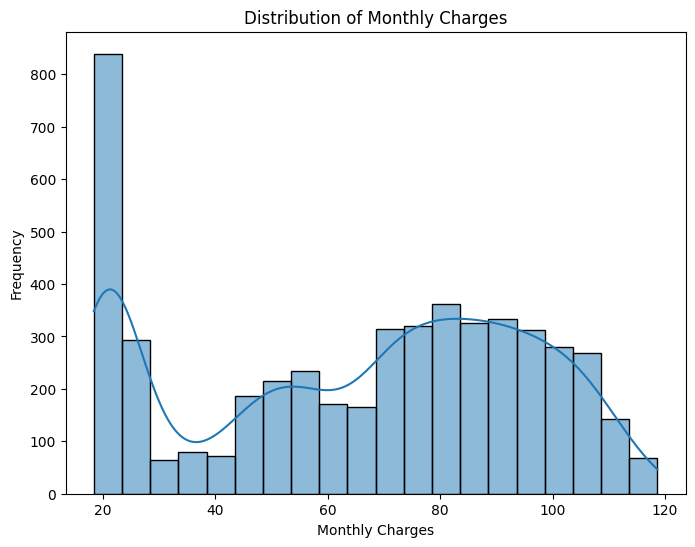


Summary statistics for Monthly Charges:
count    5043.000000
mean       65.090214
std        30.068133
min        18.400000
25%        35.775000
50%        70.550003
75%        90.050003
max       118.650002
Name: monthlycharges, dtype: float64


In [35]:
# Monthly Charges
plt.figure(figsize=(8, 6))
sns.histplot(train_df['monthlycharges'], bins=20, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

print("\nSummary statistics for Monthly Charges:")
print(train_df['monthlycharges'].describe())


#### **Key Insights**

The summary statistics reveal that the mean monthly charge is around $65, with a standard deviation of $30. This suggests a relatively wide variation in monthly billing amounts across our customer base."

25% of customers have a monthly charge of $35.78 or less, while 75% have a monthly charge of $90.05 or less. The maximum monthly charge observed in our dataset is $118.65.

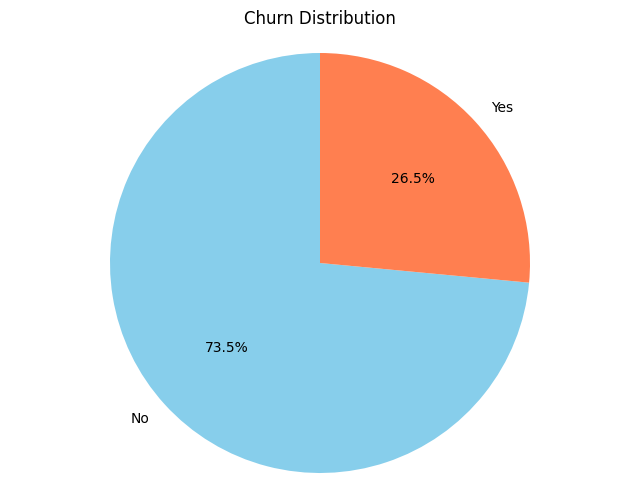


Churn distribution:
churn
No     3707
Yes    1336
Name: count, dtype: int64


In [36]:
# Plot pie chart
churn_counts = train_df['churn'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'coral'])
plt.title('Churn Distribution')
plt.axis('equal') 
plt.show()

print("\nChurn distribution:")
print(train_df['churn'].value_counts())

#### **Key Insights**

From the chart, we can see that 73.5% of customers have stayed, which is a good sign. It means that the majority of our customers are satisfied with the services and choose to continue using them.

However, there is also a significant portion, 26.5%, that did churn. This is a considerable number and it’s important to understand why these customers decided to leave.

##### Bivariate Analysis

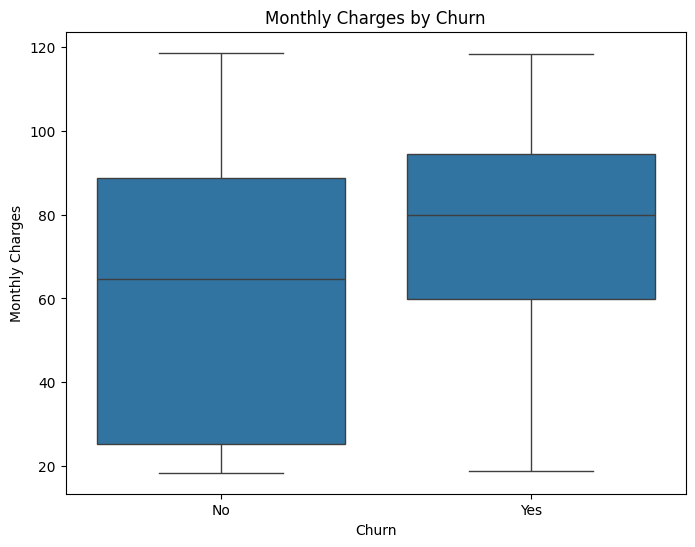

In [37]:
# Box plot of MonthlyCharges across Churn categories
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df, x='churn', y='monthlycharges')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

#### **Key Insights**

- Median Monthly Charges: The median monthly charge for customers who did not churn is lower than the median monthly charge for customers who churned. This suggests that customers with higher monthly charges are more likely to churn.

- Interquartile Range (IQR): The interquartile range (IQR), represented by the length of the box, is wider for customers who churned compared to those who did not churn. This indicates a greater variability in monthly charges among the churned customers, potentially due to a wider range of service plans or usage patterns.

Churn Rate by Gender:
churn         No       Yes
gender                    
Female  0.733897  0.266103
Male    0.736122  0.263878


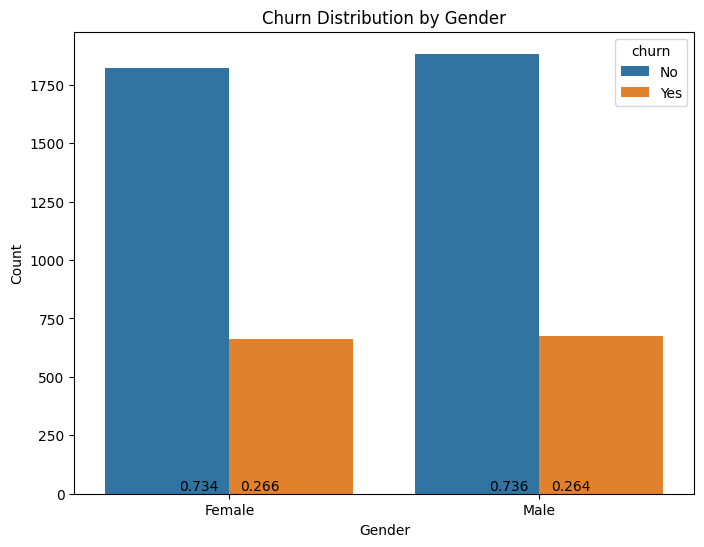

In [103]:
# Calculating churn rate by gender
churn_rate_gender = train_df.groupby('gender')['churn'].value_counts(normalize=True).unstack()

# Visualizing the relationship between gender and churn
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='gender', hue='churn')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

print("Churn Rate by Gender:")
print(churn_rate_gender)

# Adding data labels
for gender_index, gender in enumerate(churn_rate_gender.index):
    for churn_index, churn_status in enumerate(['No', 'Yes']):
        value = churn_rate_gender.loc[gender, churn_status]
        plt.text(gender_index + churn_index * 0.2 - 0.1, value, f'{value:.3f}', ha='center', va='bottom')

plt.show()

#### **Key Insights**

The churn rate by gender, we can see that the churn rate for female customers is slightly higher at 26.6% compared to 26.4% for male customers. 

However, the difference is relatively small, suggesting that gender alone may not be a strong predictor of customer churn.

##### Multivariate Analysis

In [39]:
# Correlation between Tenure and MonthlyCharges
correlation = train_df[['tenure', 'monthlycharges']].corr()
print("\nCorrelation between Tenure and Monthly Charges:")
print(correlation)

# ANOVA for MonthlyCharges across Churn categories
anova_result = train_df.groupby('churn')['monthlycharges'].mean()
print("\nANOVA results for Monthly Charges across Churn categories:")
print(anova_result)


Correlation between Tenure and Monthly Charges:
                  tenure  monthlycharges
tenure          1.000000        0.240645
monthlycharges  0.240645        1.000000

ANOVA results for Monthly Charges across Churn categories:
churn
No     61.442690
Yes    75.211003
Name: monthlycharges, dtype: float64


In [114]:
# Set the precision
pd.set_option('display.float_format', '{:.2f}'.format)

# Correlation between Tenure and MonthlyCharges
correlation = train_df[['tenure', 'monthlycharges']].corr()
print("\nCorrelation between Tenure and Monthly Charges:")
display(correlation.style.background_gradient(cmap='coolwarm'))

# ANOVA for MonthlyCharges across Churn categories
anova_result = train_df.groupby('churn')['monthlycharges'].mean()
print("\nANOVA results for Monthly Charges across Churn categories:")
display(anova_result.to_frame().style.background_gradient(cmap='coolwarm'))


`Correlation between Tenure and Monthly Charges:`


,tenure,monthlycharges
tenure,1.000000,0.240287
monthlycharges,0.240287,1.000000



ANOVA results for Monthly Charges across Churn categories:


,monthlycharges
churn,
No,61.429682
Yes,75.211003


#### **Key Insights**

`Correlation between Tenure and Monthly Charges:`

The correlation coefficient between tenure and monthly charges is 0.240645, indicating a weak positive correlation. This suggests that there is a slight tendency for customers with longer tenure to have slightly higher monthly charges, but the relationship is not very strong.

`ANOVA results for Monthly Charges across Churn categories:`

The average monthly charges for customers who churned (Yes) is approximately 75.24, while for customers who did not churn (No), it is approximately 61.43.
There is a noticeable difference in average monthly charges between churned and non-churned customers.
Customers who churned tend to have higher average monthly charges compared to those who did not churn.

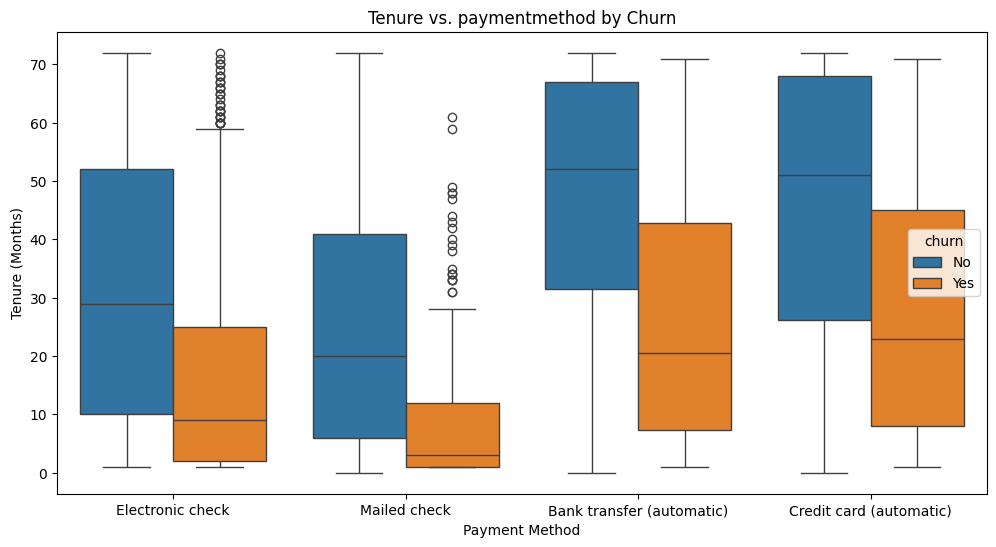

In [40]:
# Box plot of Tenure vs. MonthlyCharges vs churn
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='paymentmethod', y='tenure', hue='churn')
plt.title('Tenure vs. paymentmethod by Churn')
plt.xlabel('Payment Method')
plt.ylabel('Tenure (Months)')
plt.legend(title='churn')
plt.show()

#### **Key Insights**

- From the graph, we can observe that customers who churned generally have a shorter tenure regardless of the payment method. This could indicate that customers are more likely to churn in the early stages of using the service.

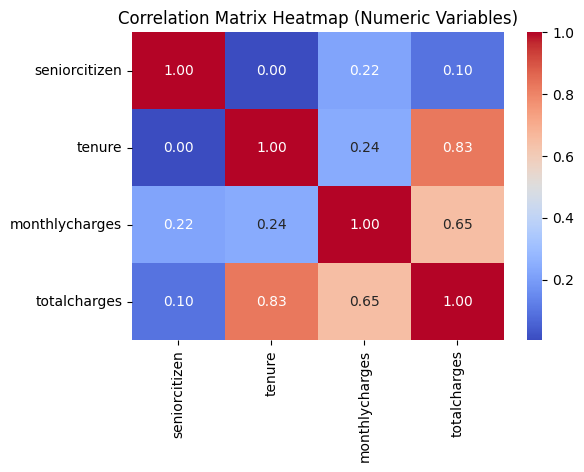

In [41]:
# Separate numeric and categorical columns
numeric_columns = train_df.select_dtypes(include=['number']).columns
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns

# Correlation Matrix and Heatmap for Numeric Variables
numeric_df = train_df[numeric_columns]
numeric_correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Numeric Variables)')
plt.show()

#### **Key Insights**

######
- `Tenure and Total Charges:` There is a strong positive correlation of 0.83 between tenure and total charges. This indicates that as tenure increases, total charges also tend to increase. This could be because the longer a customer stays, the more they are likely to use the services and hence, accumulate more charges.

- `Monthly Charges and Total Charges:` There is a moderate positive correlation of 0.65 between monthly charges and total charges. This suggests that customers with higher monthly charges tend to have higher total charges. This could be due to the fact that customers with more services or premium services tend to pay more monthly.

- `Senior Citizen and other variables:` The correlations between senior citizen and the other three variables (tenure, monthly charges, and total charges) are relatively weak. This suggests that being a senior citizen does not strongly influence these factors.

### `Answering Business Questions`

##### Question 1. What is the average tenure of customers who churned compared to those who stayed?

In [42]:
# Separate customers who churned from those who stayed
churned_customers = train_df[train_df['churn'] == 'Yes']
stayed_customers = train_df[train_df['churn'] == 'No']

# Calculate the average tenure for each group
avg_tenure_churned = churned_customers['tenure'].mean()
avg_tenure_stayed = stayed_customers['tenure'].mean()

# Compare the average tenure of the two groups
print("Average tenure of churned customers:", avg_tenure_churned)
print("Average tenure of stayed customers:", avg_tenure_stayed)

Average tenure of churned customers: 18.24176646706587
Average tenure of stayed customers: 37.74291880226598


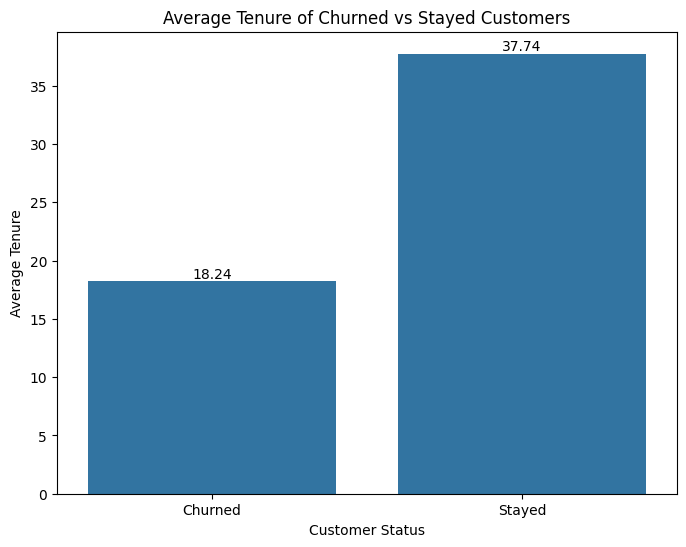

In [43]:
# Visualizing the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Churned', 'Stayed'], y=[avg_tenure_churned, avg_tenure_stayed])
plt.title('Average Tenure of Churned vs Stayed Customers')
plt.xlabel('Customer Status')
plt.ylabel('Average Tenure')

# Adding data labels
for index, value in enumerate([avg_tenure_churned, avg_tenure_stayed]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

#### **Key Insights**

- The average tenure of customers who churned is 18.24 months(around 1.5 years), while for those who stayed, it is 37.74 months(around 3.1 years).

##### Question 2. Do customers with partners or dependents have a lower churn rate?

In [44]:
# Calculate churn rate for customers with partners
partner_churn_rate = train_df[train_df['partner'] == 'Yes']['churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers without partners
no_partner_churn_rate = train_df[train_df['partner'] == 'No']['churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers with dependents
dependent_churn_rate = train_df[train_df['dependents'] == 'Yes']['churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers without dependents
no_dependent_churn_rate = train_df[train_df['dependents'] == 'No']['churn'].value_counts(normalize=True)['Yes']

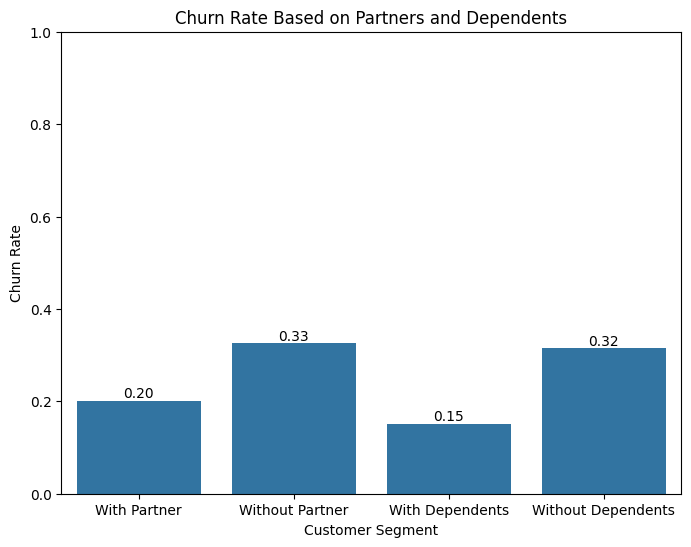

In [45]:
# Visualize the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['With Partner', 'Without Partner', 'With Dependents', 'Without Dependents'], 
            y=[partner_churn_rate, no_partner_churn_rate, dependent_churn_rate, no_dependent_churn_rate])
plt.title('Churn Rate Based on Partners and Dependents')
plt.xlabel('Customer Segment')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)  
# Set y-axis limits from 0 to 1

# Adding data labels
for index, value in enumerate([partner_churn_rate, no_partner_churn_rate, dependent_churn_rate, no_dependent_churn_rate]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

#### **Key Insights**

- Partner Influence: Customers with partners have a churn rate of 0.20, which is significantly lower than the 0.33 churn rate of customers without partners. This suggests that having a partner may provide stability or satisfaction that reduces the likelihood of leaving the service.

- Dependents Impact: Similarly, customers with dependents show a churn rate of 0.15, which is less than half the churn rate of 0.32 for those without dependents.

##### Question 3: How does the presence of multiple lines affect customer churn?

To analyze this question, we can:

- Visualize the distribution of churn among customers with and without multiple lines.
- Calculate the churn rate for customers with and without multiple lines.
- Conduct a statistical test (such as a chi-square test) to determine if there is a significant association between the presence of multiple lines and churn.

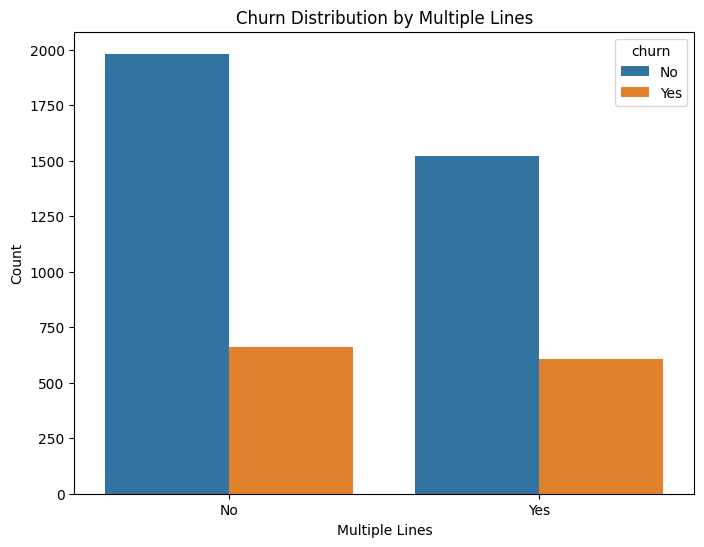

Churn Rate by Presence of Multiple Lines:
multiplelines
No    0.25
Yes   0.29
Name: churn_numeric, dtype: float64

Chi-square Test Results for Multiple Lines and Churn:
Chi-square value: 7.499396411455509
p-value: 0.006171967510333475


In [117]:
# Visualizing the relationship between multiple lines and churn
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='multiplelines', hue='churn')
plt.title('Churn Distribution by Multiple Lines')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.show()

# Calculating churn rate by presence of multiple lines
# Convert 'churn' column to numeric using label encoding
train_df['churn_numeric'] = train_df['churn'].map({'No': 0, 'Yes': 1})
churn_rate_multiple_lines = train_df.groupby('multiplelines')['churn_numeric'].mean()
print("Churn Rate by Presence of Multiple Lines:")
print(churn_rate_multiple_lines)

# Chi-square test for association between multiple lines and churn
chi2, p_val, _, _ = chi2_contingency(pd.crosstab(train_df['multiplelines'], train_df['churn']))
print("\nChi-square Test Results for Multiple Lines and Churn:")
print("Chi-square value:", chi2)
print("p-value:", p_val)

#### **Key Insights**

- Customers with multiple lines tend to have a slightly higher churn rate compared to those without multiple lines.

- The chi-square test results suggest that the presence of multiple lines is significantly associated with churn.

This indicates that the presence of multiple lines may influence customer churn behavior, and it could be an important factor to consider in churn prediction and retention strategies.
Overall, these insights suggest that the presence of multiple lines could be a relevant factor in understanding and predicting customer churn.

##### Question 4: Is there a correlation between the contract term (Contract) and customer churn?

For this question, we can:

- Visualize the distribution of churn across different contract terms.
- Calculate the churn rate for each contract term category.
- Analyze the relationship between contract term and churn using a chi-square test or other appropriate statistical test.
- Additionally, we can examine the average tenure for customers with different contract terms to understand the potential impact on churn.

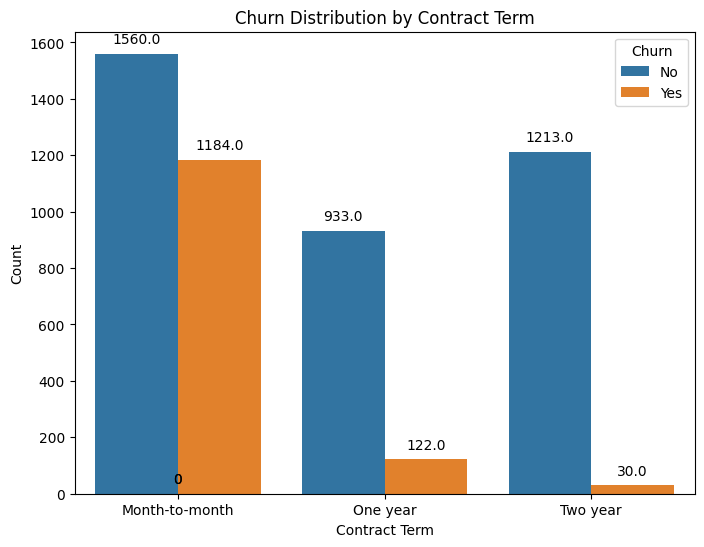


Churn Rate by Contract Term:
churn            No  Yes
contract                
Month-to-month 0.57 0.43
One year       0.88 0.12
Two year       0.98 0.02

Chi-square Test Results for Contract Term and Churn:
Chi-square value: 881.6208905118242
p-value: 3.61789584641233e-192


In [116]:
# Plotting the relationship between contract term and churn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='contract', hue='churn')

# Adding data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Churn Distribution by Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Calculating churn rate by contract term
churn_rate_contract = train_df.groupby('contract')['churn'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Contract Term:")
print(churn_rate_contract)

# Chi-square test for association between contract term and churn
chi2, p_val, _, _ = chi2_contingency(pd.crosstab(train_df['contract'], train_df['churn']))
print("\nChi-square Test Results for Contract Term and Churn:")
print("Chi-square value:", chi2)
print("p-value:", p_val)

#### **Key Insights**

- Customers with longer contract terms (one year and two years) have significantly lower churn rates compared to those with month-to-month contracts.

- The chi-square test results confirm that there is a strong association between contract term and churn.
This suggests that the contract term is a critical factor influencing customer churn behavior, with longer-term contracts leading to lower churn rates.

Overall, these insights indicate that contract term is a significant predictor of customer churn, and it should be a key consideration in churn prediction models and retention strategies. Offering longer-term contracts may help reduce churn and improve customer retention rates.

##### Question 5: What are the common payment methods (Payment Method) among customers who churned?

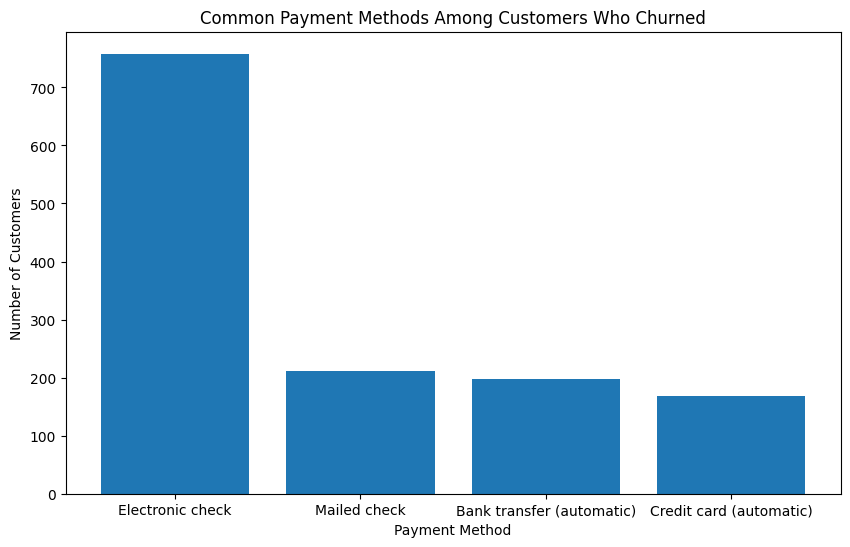

In [120]:
churned_customers = train_df[train_df['churn'] == 'Yes']
common_payment_methods = churned_customers['paymentmethod'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(common_payment_methods.index, common_payment_methods.values)
plt.title('Common Payment Methods Among Customers Who Churned')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.show()

#### **Key Insights**

- From the plot shown above, the common payment method for clients who churned is using Electronic check.

##### Question 6: How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?

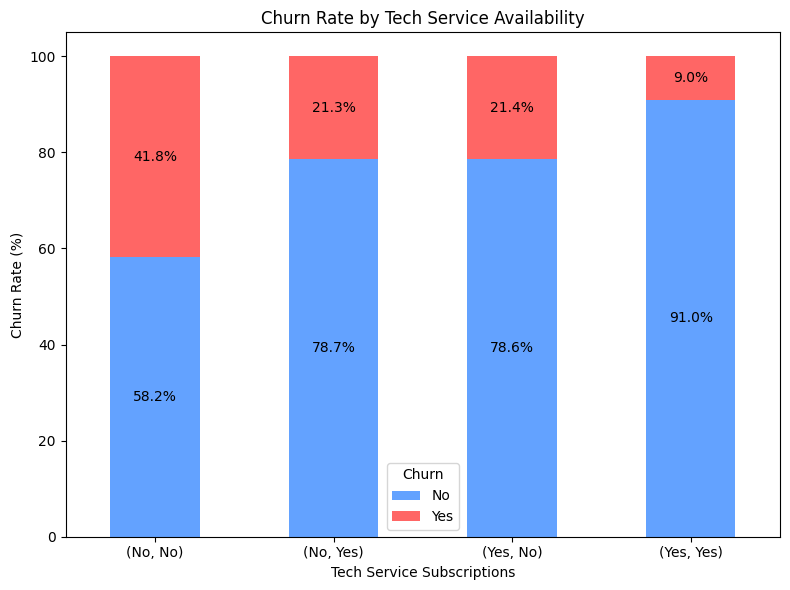

In [127]:
# Group data by subscription to tech services and churn
tech_service_groups = train_df.groupby(['onlinesecurity', 'techsupport', 'churn'])['gender'].count().unstack(fill_value=0)

# Calculate churn rate for each group
churn_rate = tech_service_groups.div(tech_service_groups.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
churn_rate.plot(kind='bar', stacked=True, color=['#63A2FF', '#FF6665'], ax=ax)
plt.xlabel('Tech Service Subscriptions')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tech Service Availability')
plt.xticks(rotation=0)

# Add percentage labels to bars
for i, (index, row) in enumerate(churn_rate.iterrows()):
    cum_value = 0
    for churn, value in row.items():
        ax.text(i, cum_value + value/2, f"{value:.1f}%", ha='center', va='center')
        cum_value += value

plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


#### **Key Insights**

- Customers with no tech support are most likely to churn, while those with both security and support have the lowest churn rate.

##### Question 7: What percentage of customers who churned had streaming services (StreamingTV, StreamingMovies)?

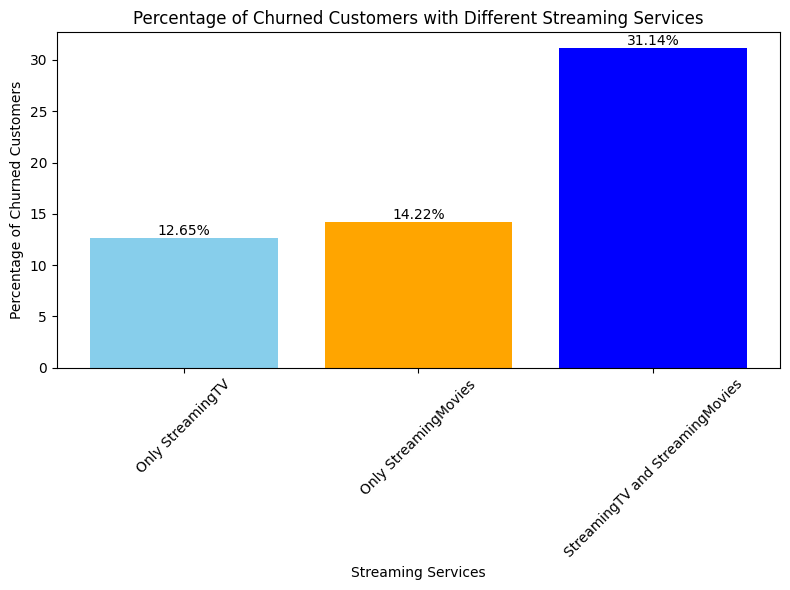

In [126]:

# Filter the DataFrame to include only churned customers
churned_customers = train_df[train_df['churn'] == 'Yes']
 
# Calculate the number of churned customers with different streaming services
streaming_tv_churned_count = len(churned_customers[(churned_customers['streamingtv'] == 'Yes') & (churned_customers['streamingmovies'] == 'No')])
streaming_movies_churned_count = len(churned_customers[(churned_customers['streamingtv'] == 'No') & (churned_customers['streamingmovies'] == 'Yes')])
both_streaming_churned_count = len(churned_customers[(churned_customers['streamingtv'] == 'Yes') & (churned_customers['streamingmovies'] == 'Yes')])
 
# Calculate the total number of churned customers
total_churned_customers = len(churned_customers)
 
# Calculate the percentage of churned customers for each category
percentage_streaming_tv_churned = (streaming_tv_churned_count / total_churned_customers) * 100
percentage_streaming_movies_churned = (streaming_movies_churned_count / total_churned_customers) * 100
percentage_both_streaming_churned = (both_streaming_churned_count / total_churned_customers) * 100
 
# Plotting the grouped bar plot
categories = ['Only StreamingTV', 'Only StreamingMovies', 'StreamingTV and StreamingMovies']
percentages = [percentage_streaming_tv_churned, percentage_streaming_movies_churned, percentage_both_streaming_churned]
 
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, percentages, color=['skyblue', 'orange', 'blue'])
 
# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')
 
plt.xlabel('Streaming Services')
plt.ylabel('Percentage of Churned Customers')
plt.title('Percentage of Churned Customers with Different Streaming Services')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Question 8: Is there a difference in churn rates between senior citizens and non-senior citizen

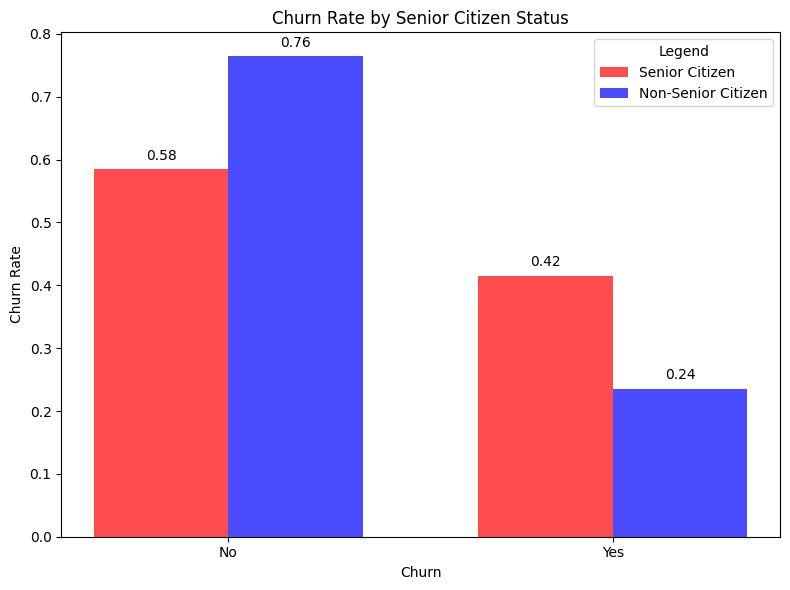

In [51]:
# Calculate churn rates for senior and non-senior citizens
senior_churn_rate = train_df[train_df['seniorcitizen'] == 1]['churn'].value_counts(normalize=True)
non_senior_churn_rate = train_df[train_df['seniorcitizen'] == 0]['churn'].value_counts(normalize=True)

# Plotting the grouped bar plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(senior_churn_rate))

bars1 = plt.bar(index, senior_churn_rate, bar_width, color='red', label='Senior Citizen', alpha=0.7)
bars2 = plt.bar([i + bar_width for i in index], non_senior_churn_rate, bar_width, color='blue', label='Non-Senior Citizen', alpha=0.7)

# Adding data labels to each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.xlabel('Churn')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Senior Citizen Status')
plt.xticks([i + bar_width / 2 for i in index], senior_churn_rate.index)
plt.legend(title='Legend')
plt.tight_layout()
plt.show()

#### `Testing Hypothesis`

##### Hypothesis 1
`Null Hypothesis(Ho):` Customers with longer tenure (number of months stayed with the company) are more likely to churn compared to new customers.

`Alternative Hypothesis(Ha):` Customers with longer tenure (number of months stayed with the company) are less likely to churn compared to new customers.


In [52]:
# Convert 'churn' column to numeric using label encoding
train_df['churn_numeric'] = train_df['churn'].map({'No': 0, 'Yes': 1})

# Calculate the median tenure
median_tenure = train_df['tenure'].median()

# Divide the dataset into two groups based on median tenure
short_tenure = train_df[train_df['tenure'] <= median_tenure]['churn_numeric']
long_tenure = train_df[train_df['tenure'] > median_tenure]['churn_numeric']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(short_tenure, long_tenure)

# Print the test statistic (U statistic) and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in churn rates between customers with shorter and longer tenure.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in churn rates between customers with shorter and longer tenure.")

Mann-Whitney U statistic: 4014951.5
P-value: 2.3706196320266987e-99
Reject Null Hypothesis: There is a significant difference in churn rates between customers with shorter and longer tenure.


##### Hypothesis 2

`Null Hypothesis (Ho)`: Customers with higher monthly charges (MonthlyCharges) are more likely to churn due to cost considerations.

`Alternative Hypothesis (Ha)`: Customers with higher monthly charges (MonthlyCharges) are less likely to churn due to cost considerations.

In [53]:
# Encode 'churn' column into numeric values
train_df['churn_numeric'] = train_df['churn'].replace({'Yes': 1, 'No': 0})

# Calculate the median value for monthlycharge
median_monthlycharge = train_df['monthlycharges'].median()

# Divide the data into two categories
high_monthlycharge = train_df[train_df['monthlycharges'] >= median_monthlycharge]['churn_numeric']
low_monthlycharge = train_df[train_df['monthlycharges'] < median_monthlycharge]['churn_numeric']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(high_monthlycharge, low_monthlycharge)

# Print the test statistic (U statistic) and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# State the significance level
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in churn rates between customers with higher and lower monthly charge.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in churn rates between customers with higher and lower monthly charge.")

Mann-Whitney U statistic: 3743974.5
P-value: 2.219391973354535e-46
Reject Null Hypothesis: There is a significant difference in churn rates between customers with higher and lower monthly charge.


### `Data Preparation`

In [54]:
train_df = pd.read_csv('DataSets/Train_Dataset/train.csv')

In [55]:
train_df.head(2)

,Unnamed: 0,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,NaN,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.50,No


In [56]:
train_df.drop(columns=['customerid','Unnamed: 0'], axis = 1, inplace = True)

In [57]:
train_df.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.50,No


In [58]:
train_df.isna().sum()

gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          8
churn                 1
dtype: int64

- To prevent data leakage, droping row with missing value in the churn column

In [59]:
train_df.dropna(subset='churn', inplace=True)

- Check if the target variable is balanced

In [60]:
churn_distribution = train_df['churn'].value_counts().rename('total').reset_index()
churn_distribution

,churn,total
0,No,3706
1,Yes,1336


- Visualize the churn distribution

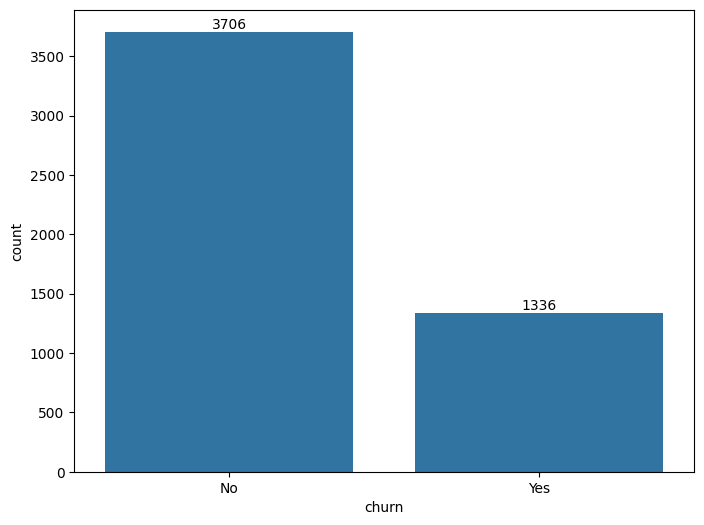

In [61]:
# Create the figure
plt.figure(figsize=(8, 6))

ax=sns.countplot(train_df, x='churn')

# Add count values on top of each bar
for p in ax.patches:
    count = int(p.get_height())  # Convert count to integer
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

##### Splitting the data into `X` and `y` variables

In [62]:
X = train_df.drop('churn', axis =1)
y = train_df[['churn']]

##### Splitting `X` and `y` into `train` and `eval`

In [63]:
X_train, X_eval, y_train, y_eval =  train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##### Encode `y` train and `eval` using Label encoder

In [64]:
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train['churn'])
y_eval_encoded = encoder.transform(y_eval['churn'])

### `Preparing Pipelines`

In [65]:
numerical_columns = X.select_dtypes('number').columns
categorical_columns = X.select_dtypes('object').columns

In [66]:
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy = 'median')),
    ('num_scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat-encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

### `Modelling`

In [67]:
models =[
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_reg', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('random_forest', RandomForestClassifier(random_state = 42))
]

# Creating dictionary for the models
all_pipelines = {}

# Create an empty DataFrame for metrics
metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Loop over models and create pipelines, fit models, and calculate metrics
for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on training data
    final_pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the evaluation dataset
    y_pred = final_pipeline.predict(X_eval)
    
    # Calculate classification report metrics
    metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Extract metrics for the current model
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Add metrics to metrics_table
    metrics_table.loc[len(metrics_table)] = [model_name, accuracy, precision, recall, f1_score]

# Display the metrics table
metrics_table.sort_values(ascending=False, by='f1_score')

,model_name,accuracy,precision,recall,f1_score
1,Logistic_reg,0.799802,0.794989,0.799802,0.796963
3,random_forest,0.786918,0.776866,0.786918,0.779906
2,knn,0.765114,0.764275,0.765114,0.764687
0,Decision_tree,0.723489,0.731998,0.723489,0.727303


### `Hyperparameter Tuning`

In [68]:
# Define the hyperparameters to search
param_grids = {
    'Decision_tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },

    'Logistic_reg': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],        
        'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'classifier__max_iter': [300]
    },

    'knn': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11]
    },

    'random_forest': {
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30]
    }
}
params = {}
search_histories = {}

for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(
        estimator = final_pipeline, 
        param_grid = param_grid, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
        scoring = ['f1_weighted', 'precision', 'recall'],
        refit = 'f1_weighted',
        verbose = 3, 
        n_jobs = -1
    )
    grid_search.fit(X_train, y_train_encoded)
    params[model_name] = grid_search
        
    search_history = pd.DataFrame(grid_search.cv_results_)        
    search_histories[model_name] = search_history

for model_name, grid_search in params.items():
    print(f'Best hyperparamters for {model_name}:{grid_search.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparamters for Decision_tree:{'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best hyperparamters for Logistic_reg:{'classifier__C': 0.1, 'classifier__max_iter': 300, 'classifier__solver': 'newton-cg'}
Best hyperparamters for knn:{'classifier__n_neighbors': 11}
Best hyperparamters for random_forest:{'classifier__max_depth': 10, 'classifier__n_estimators': 200}


#### Geting Models with the best hyperparamters

In [69]:
def get_best_models(params):
    best_models = []
    for model_name, grid_search in params.items():
        best_model = grid_search.best_estimator_
        best_models.append((model_name, best_model))    
    return best_models

best_models = get_best_models(params)

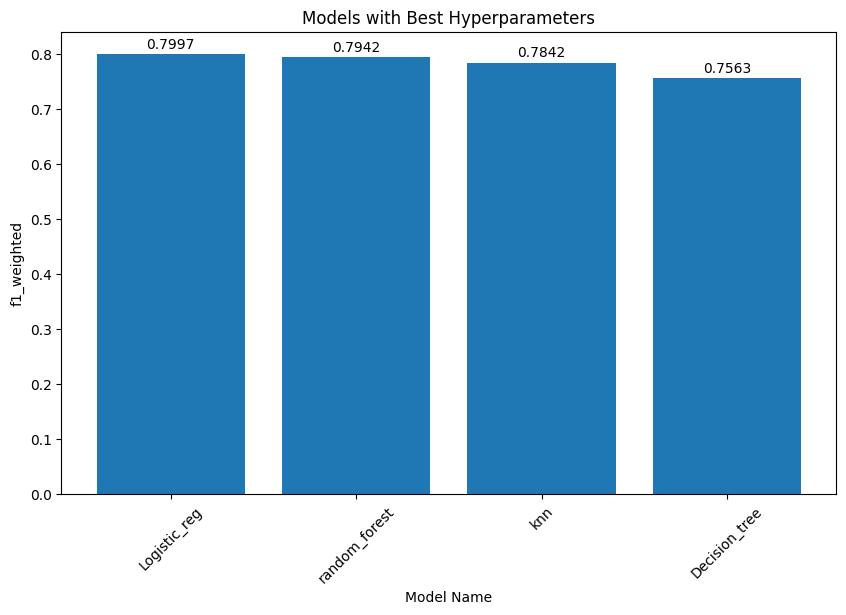

In [70]:
# Get models f1_weighted scores and names
model_names = [model_name for model_name in search_histories.keys()]
model_scores = [search_history['mean_test_f1_weighted'].max() for search_history in search_histories.values()]

# Create a DataFrame to for plot
df_models = pd.DataFrame({'model_name': model_names, 'f1_score': model_scores})
df_models = df_models.sort_values(by='f1_score', ascending=False)

# Create a bar chart
plt.figure(figsize=(10,6))
plt.bar(data=df_models, x='model_name', height='f1_score')

# Add text labels to the bars
for i, score in enumerate(df_models['f1_score']):
    plt.text(i, score+0.01, '{:1.4f}'.format(score), ha="center")

plt.xlabel('Model Name')
plt.ylabel('f1_weighted')
plt.title('Models with Best Hyperparameters')
plt.xticks(rotation=45)
plt.show()

In [71]:
metric_before_after_tuning_models = pd.merge(
    metrics_table[['model_name', 'f1_score']], 
    df_models, 
    on='model_name', 
    how='inner', 
    suffixes=('_before', '_after')
).sort_values(ascending=False, by='f1_score_after')

metric_before_after_tuning_models

,model_name,f1_score_before,f1_score_after
1,Logistic_reg,0.796963,0.799653
3,random_forest,0.779906,0.794231
2,knn,0.764687,0.784230
0,Decision_tree,0.727303,0.756317


##### Comparing models before and after hyperparameter tuning by using f1 score (weighted) metric.

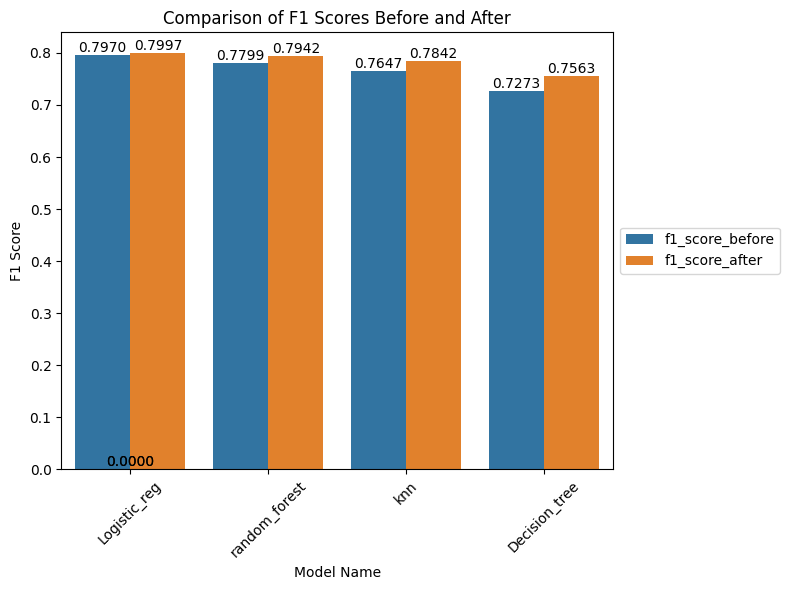

In [72]:
# Melt the DataFrame to combine f1_score_before and f1_score_after into a single column
metric_melted = metric_before_after_tuning_models.melt(id_vars='model_name', var_name='score_type', value_name='f1_score')

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the combined data
ax = sns.barplot(data=metric_melted, x='model_name', y='f1_score', hue='score_type')
plt.title('Comparison of F1 Scores Before and After')
plt.xlabel('Model Name')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)

# Annotate the values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
    
# Move legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

- Feature importances visualizations

In [73]:
best_model_name = df_models['model_name'].iloc[0]
best_model = dict(best_models).get(best_model_name)
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat-encoder',
                                                                   OneH...re'))]),
                                                  Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=0.1, max_iter=300, random_state=42,
                                    solver='newton-cg'))])

##### Evaluating the best model on the evaluation set

In [74]:
y_eval_pred = best_model.predict(X_eval)
print(f'Classification report of the best model- {best_model_name}\n\n{classification_report(y_true=y_eval_encoded, y_pred=y_eval_pred)}')

Classification report of the best model- Logistic_reg

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       742
           1       0.64      0.57      0.60       267

    accuracy                           0.80      1009
   macro avg       0.74      0.73      0.73      1009
weighted avg       0.79      0.80      0.80      1009



##### Preparing the test dataset

In [75]:
test_df = pd.read_excel('DataSets/Telco-churn-last-2000.xlsx')

In [76]:
test_df.drop('customerID', axis=1, inplace =True)

In [77]:
test_df.columns = test_df.columns.str.lower()

In [78]:
# test_df['totalcharges'] = test_df['totalcharges'].
test_df['totalcharges'] = pd.to_numeric(test_df['totalcharges'], errors = 'coerce')

In [79]:
train_df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


- Now, Using the Test Data to test our model and predict churn of customers

In [80]:
predicted_churn = best_model.predict(test_df)
predicted_churn

array([1, 0, 0, ..., 1, 0, 0])

- Creating an array of corresponding labels

In [81]:
labels = np.array(['No', 'Yes']) # Index 0 is No, 1 is Yes
test_df['predicted_churn'] = labels[predicted_churn]

In [82]:
test_df.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,predicted_churn
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,No


#### Visualizing the predicted churn 

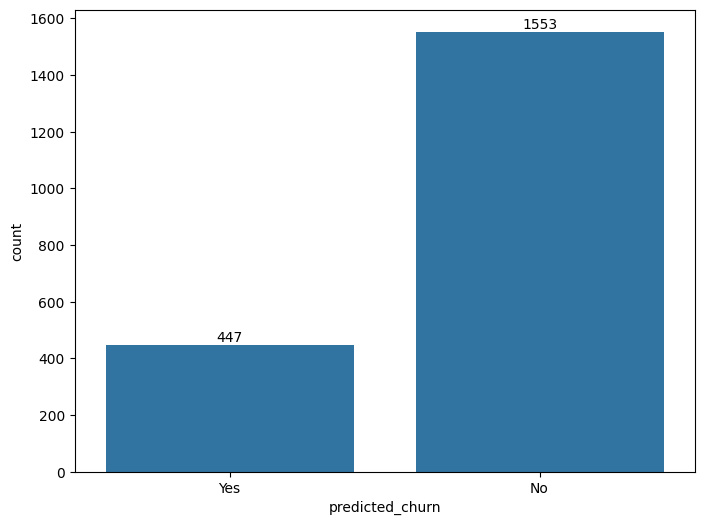

In [83]:
# Create the figure
plt.figure(figsize=(8, 6))

ax=sns.countplot(test_df, x='predicted_churn')

# Add count values on top of each bar
for p in ax.patches:
    count = int(p.get_height())  # Convert count to integer
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()